# Footnote Visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

footnotes_df = pd.read_csv('../../../Dropbox/Footnote article/Data Manifests/ECCOFictionTXTLab.csv', encoding='utf-8', parse_dates=True)

## Table of Contents:
    
1. [Visualizations of ECCOFictionTXTLab.csv (without annotations)](#1.-Visualizations-of-ECCOFictionTXTLab.csv-(without-annotations))
2. [One Footnote Subset](#2.-One-Footnote-Subset)
3. [One Footnote Subset, with tags](#3.-One-Footnote-Subset,-with-tags)
    - [Plot the number of footnoted and unfootnoted pages for each tag](#Plot-the-number-of-footnoted-and-unfootnoted-pages-for-each-tag)
    - [Plot the counts of each combinations of tags in our dataset](#Plot-the-counts-of-each-combinations-of-tags-in-our-dataset)
    - [Stats on our tagged one-footnote dataset](#Stats-on-our-tagged-one-footnote-dataset)

## 1. Visualizations of ECCOFictionTXTLab.csv (without annotations)
This first section of visualizations aim to give an overview of our dataset as a whole. As such, they use only the ECCOFictionTXTLab.csv.

In [2]:
footnotes_df.head(5)

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0           1  0003900900.xml     3900900  T110586  1753   
1           2  0004700401.xml     4700401  T125094  1748   
2           3  0004700402.xml     4700402  T125094  1748   
3           4  0004700403.xml     4700403  T125094  1748   
4           5  0007901400.xml     7901400  T069692  1782   

                                               Title Vol_Number  \
0  Memoires secrets pour servir <c3><a0> l'histoi...          0   
1  Anecdotes de la cour de Fran<c3><a7>ois I. Par...   Volume 1   
2  Anecdotes de la cour de Fran<c3><a7>ois I. Par...   Volume 2   
3  Anecdotes de la cour de Fran<c3><a7>ois I. Par...   Volume 3   
4  The history of the civil wars in Germany, from...          0   

                        Author  \
0  M. M. C. F., Ecu<c3><a8>ier   
1        Lussan, Marguerite de   
2        Lussan, Marguerite de   
3        Lussan, Marguerite de   
4                Defoe, Daniel   

                                             Imprint  \
0           London : printed for R. Jennys, [1753?].   
1  Londres [i.e. Paris?] : chez Jean Nours [sic],...   
2  Londres [i.e. Paris?] : chez Jean Nours [sic],...   
3  Londres [i.e. Paris?] : chez Jean Nours [sic],...   
4  Newark : printed by James Tomlinson, for the p...   

                                      Field_Headings  fn_pages  nofn_pages  \
0                       French fiction, 18th century         0          30   
1  France, Court and courtiers, France, History, ...         0         304   
2  France, Court and courtiers, France, History, ...         1         343   
3  France, Court and courtiers, France, History, ...         0         309   
4  Thirty Years' War, 1618-1648, Fiction, Great B...         2         379   

             TableName  fn.percent  decade  
0  Manifest_HistAndGeo    0.000000    1750  
1  Manifest_HistAndGeo    0.000000    1740  
2  Manifest_HistAndGeo    0.002907    1740  
3  Manifest_HistAndGeo    0.000000    1740  
4  Manifest_HistAndGeo    0.005249    1780

In [3]:
# Add a new column to the dataframe called "Footnotes_present", which will read "True" if fn_pages are not 0
footnotes_df.loc[footnotes_df['fn_pages'] > 0, 'Footnotes_present'] = 'True' 

In [4]:
# Fix a date error 
footnotes_df = footnotes_df.replace(to_replace=5480,
                     value=1710)
footnotes_df['Date'].max()

1809

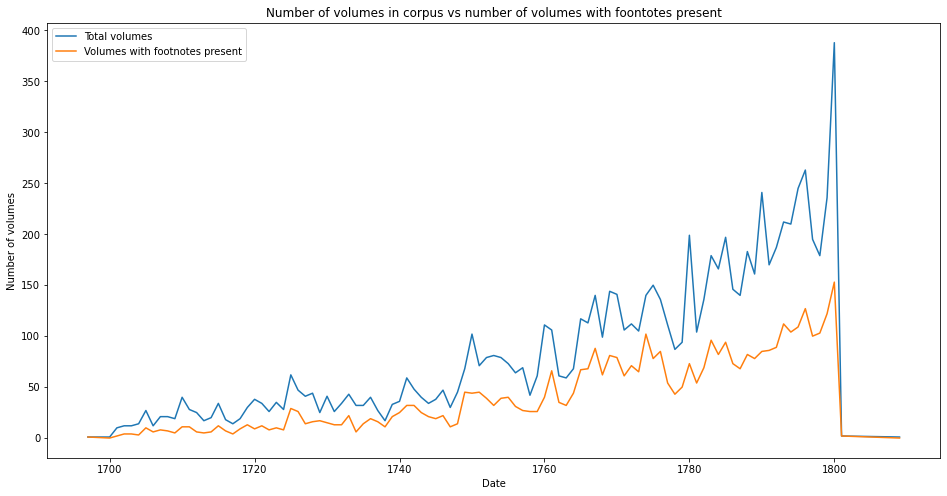

In [5]:
# Plot a time series of the total volumes in our dataset vs. the total volumes w/ footnotes
# so that we can compare trends
footnotes_df.groupby('Date')[['DocumentID', 'Footnotes_present']].count().plot(title="Number of volumes in corpus vs number of volumes with foontotes present", figsize=(16,8))\
.set_ylabel("Number of volumes")
plt.legend(["Total volumes", "Volumes with footnotes present"])

Text(0, 0.5, 'Number of pages')

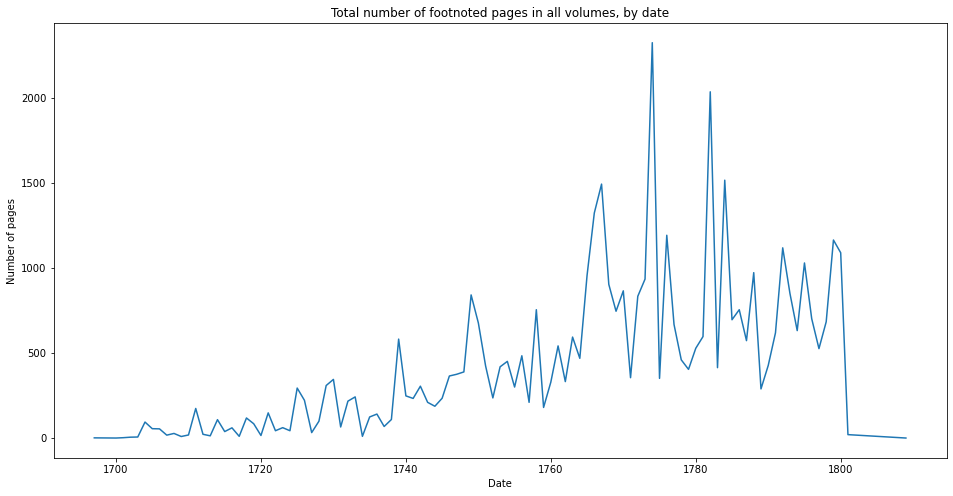

In [6]:
# Plot a time series of the total number of footnoted pages in all volumes
footnotes_df.groupby('Date')['fn_pages'].sum().plot(title="Total number of footnoted pages in all volumes, by date", figsize=(16,8)).set_ylabel("Number of pages")

Text(0, 0.5, 'Number of pages')

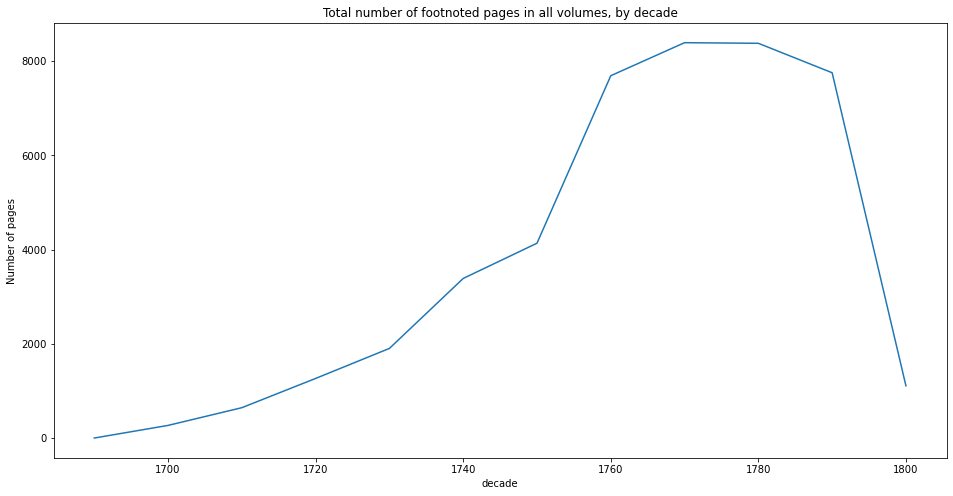

In [7]:
# Plot a time series (by decade, not year), of the total number of footnoted pages in all volumes
footnotes_df.groupby('decade')['fn_pages'].sum().plot(title="Total number of footnoted pages in all volumes, by decade", figsize=(16,8)).set_ylabel("Number of pages")

Text(0, 0.5, 'Percentage (as decimal)')

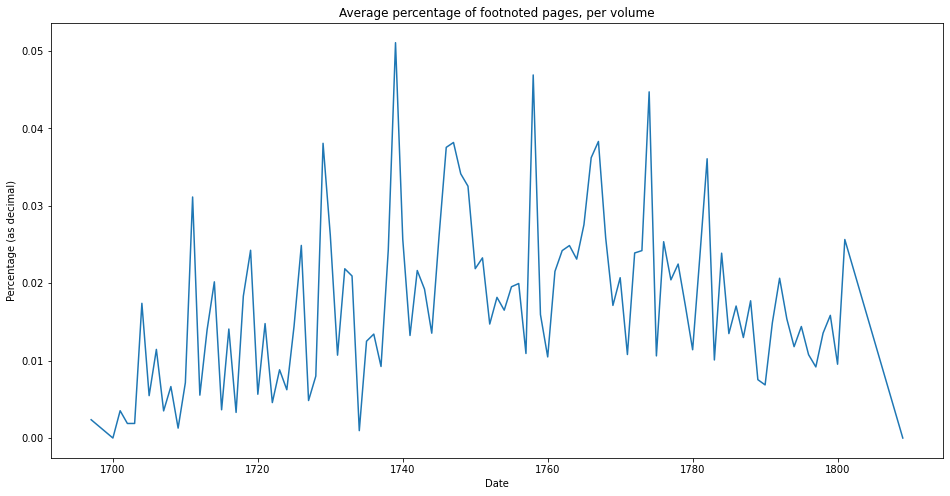

In [8]:
# Plot a time series of the average percentage of footnoted pages, per volume
footnotes_df.groupby('Date')['fn.percent'].mean().plot(title="Average percentage of footnoted pages, per volume", figsize=(16,8)).set_ylabel("Percentage (as decimal)")

Text(0, 0.5, 'Percentage (as decimal)')

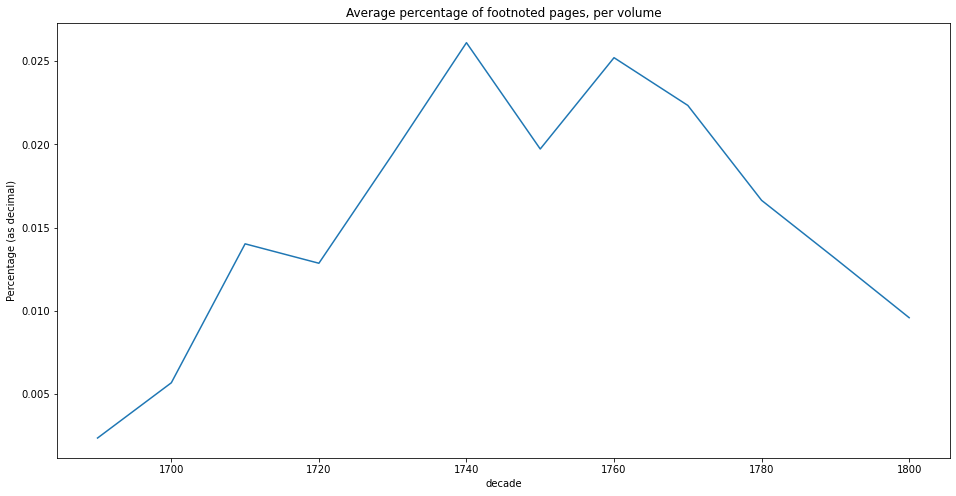

In [9]:
# Plot a time series (by decade) of the average percentage of footnoted pages, per volume
footnotes_df.groupby('decade')['fn.percent'].mean().plot(title="Average percentage of footnoted pages, per volume", figsize=(16,8)).set_ylabel("Percentage (as decimal)")

Text(0, 0.5, 'Number of volumes')

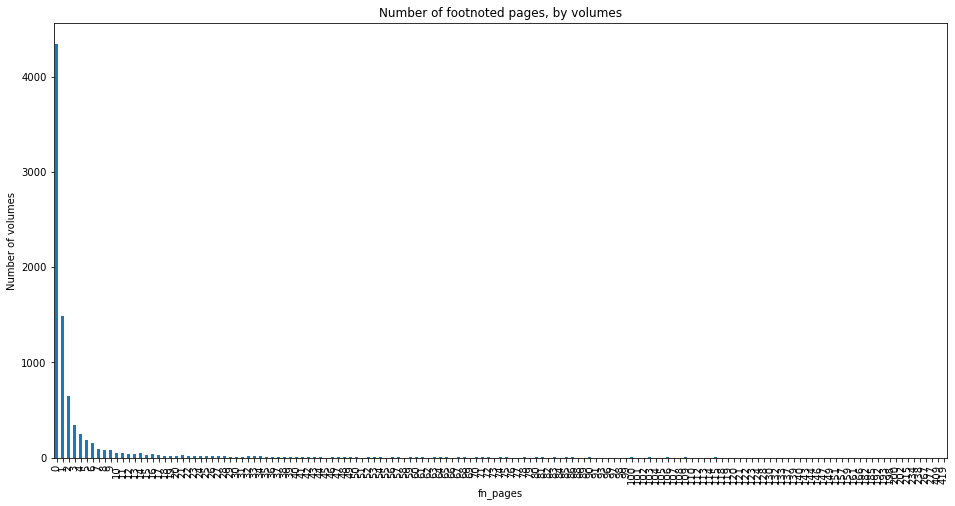

In [10]:
# Plot the number of volumes by respective number of footnoted pages
footnotes_df.groupby('fn_pages')['DocumentID'].count().plot(kind='bar', title="Number of footnoted pages, by volumes", figsize=(16,8)).set_ylabel("Number of volumes")

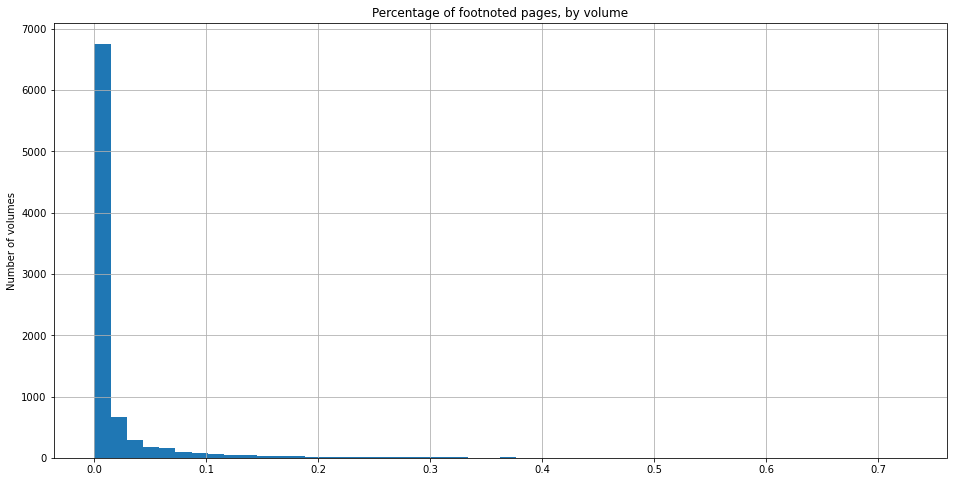

In [11]:
# Plot the number of volumes by percentage of footnoted pages (using a historgram to bin percentages)
fig, ax = plt.subplots(figsize = (6,4))
footnotes_df['fn.percent'].plot(kind = "hist", bins=50, figsize=(16,8), \
                              title="Percentage of footnoted pages, by volume", \
                             grid=True).set_ylabel("Number of volumes")
plt.show()

Text(0, 0.5, 'Number of volumes')

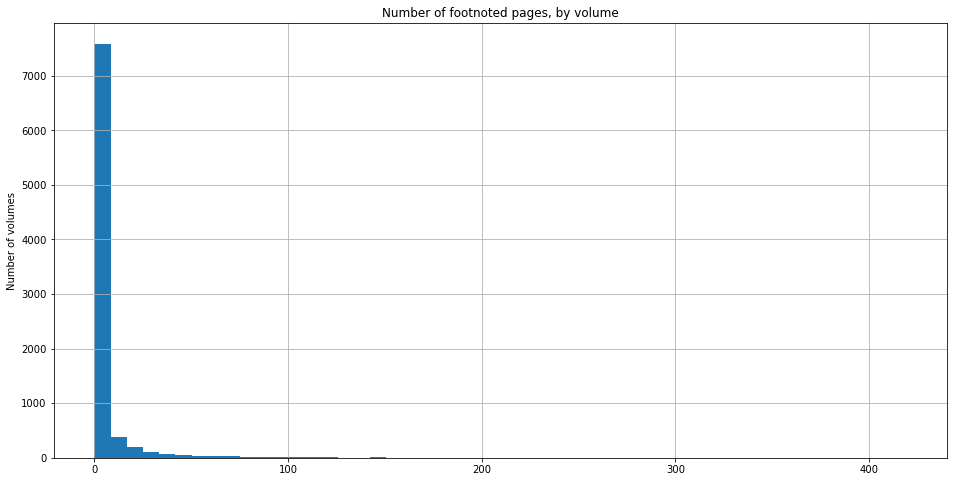

In [12]:
# Plot the number of volumes by number of footnoted pages (using a historgram to bin the number)
footnotes_df['fn_pages'].plot(kind='hist', bins=50, figsize=(16,8), \
                              title="Number of footnoted pages, by volume", \
                             grid=True).set_ylabel("Number of volumes")


In [13]:
# Write a function to identify only the rows with footnotes present
def just_footnotes(row):
  if row['fn_pages'] > 0:
    return row['fn_pages']
  else:
    return ''

# Use our function to add a new column to our dataframew with just the rows with foonotes
footnotes_df['just_footnotes'] = footnotes_df.apply(just_footnotes, axis=1)

In [14]:
footnotes_df[['just_footnotes']] = footnotes_df[['just_footnotes']].apply(pd.to_numeric)  

In [15]:
footnotes_df['just_footnotes'].dtype

dtype('float64')

Text(0, 0.5, 'Number of volumes')

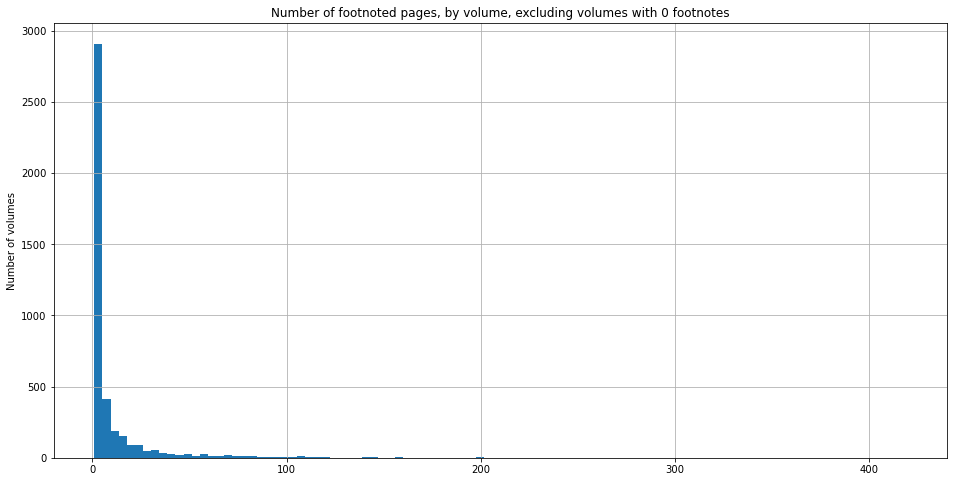

In [16]:
# Using the new column we created
# Plot the distribution of footnoted pages in volumes with footnotes present
footnotes_df['just_footnotes'].plot(kind='hist', bins=100, figsize=(16,8), \
                              title="Number of footnoted pages, by volume, excluding volumes with 0 footnotes", \
                             grid=True).set_ylabel("Number of volumes")


Text(0.04, 0.5, 'common Y')

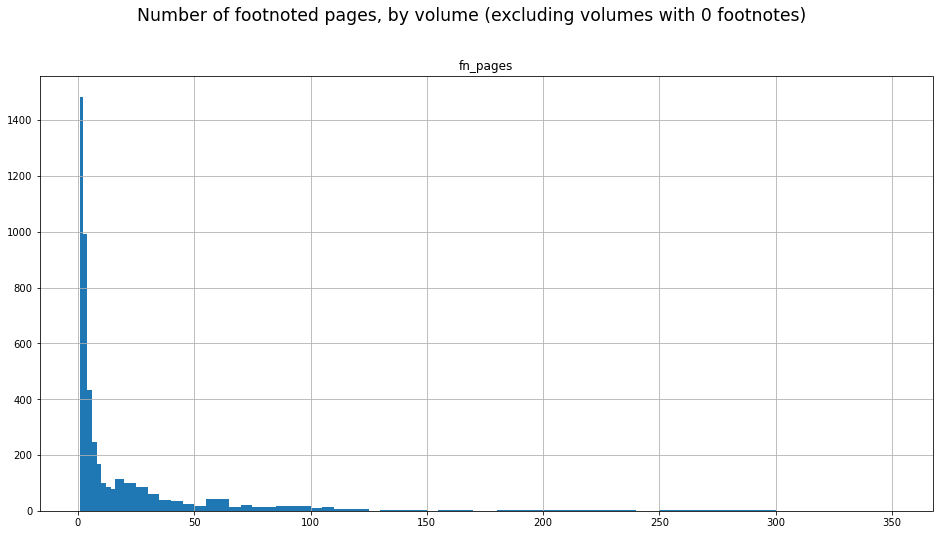

In [17]:
footnotes_df.hist('fn_pages', bins=[1, 2, 4, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40, 45, 50, 55, 65, 70, 75, 80, 85, 100, 105,  110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 170, 180, 190, 200, 220, 240, 250, 300, 350], figsize=(16,8))
plt.suptitle('Number of footnoted pages, by volume (excluding volumes with 0 footnotes)', x=0.5, y=1.0, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')

## 2. One Footnote Subset
This subset is created from the ECCO-Footnote-Manifest-volumes-with-one-footnote.csv, using the data from Nick-Reading-ECCO-Footnote-Manifest-volumes-with-one-footnote.csv and Rachel-Set-Reading-ECCO-Footnote-Manifest-volumes-with-one-footnote-Rachel-section.csv. I have concatenated the two sets here.

In [18]:
# Create a new dataframe with the annotated footnotes
one_footnote_df = pd.read_csv('RB-and-NA-Set-Reading-ECCO-Footnote-Manifest-volumes-with-one-footnote-Rachel-section.csv', encoding='utf-8', parse_dates=True)

In [19]:
one_footnote_df.head(5)

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0        5098  0000100701.xml      100701  T134638  1779   
1        5099  0000100702.xml      100702  T134638  1779   
2        5100  0000100800.xml      100800  T112791  1788   
3         450  0000200500.xml      200500  T128705  1791   
4         453  0000200700.xml      200700  T128696  1741   

                                               Title Vol_Number  \
0  Prince Arthur: an allegorical romance. The sto...   Volume 1   
1  Prince Arthur: an allegorical romance. The sto...   Volume 2   
2  Ismene and Ismenias, a novel translated from t...          0   
3  Scelta di novelle di Giovanni Boccaccio, fatta...          0   
4  The decameron, or ten days entertainment of Bo...          0   

                      Author  \
0        Bicknell, Alexander   
1        Bicknell, Alexander   
2  Eustathius, Macrembolites   
3        Boccaccio, Giovanni   
4        Boccaccio, Giovanni   

                                             Imprint  \
0  London : printed for G. Riley; and sold by F. ...   
1  London : printed for G. Riley; and sold by F. ...   
2  London [i.e. Paris] : et se trouve <c3><a0> Pa...   
3  In Londra : presso Francesco Wingrave, success...   
4  London : printed for R. Dodsley, at Tully's He...   

                                      Field_Headings  fn_pages  nofn_pages  \
0          Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
1          Spenser, Edmund,, 1552?-1599, Adaptations         1         261   
2  Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
3                      Italian fiction, 18th century         1         306   
4   Wood-engraving, English, Specimens, 17th century         1         600   

              TableName  fn.percent  decade  footnotes_present  
0  Manifest_LitAndLang2    0.003846    1770                  1  
1  Manifest_LitAndLang2    0.003817    1770                  0  
2  Manifest_LitAndLang2    0.004717    1780                  0  
3  Manifest_LitAndLang1    0.003257    1790                  0  
4  Manifest_LitAndLang1    0.001664    1740                  2

In [20]:
one_footnote_df['footnotes_present'] = one_footnote_df['footnotes_present'].astype(int)

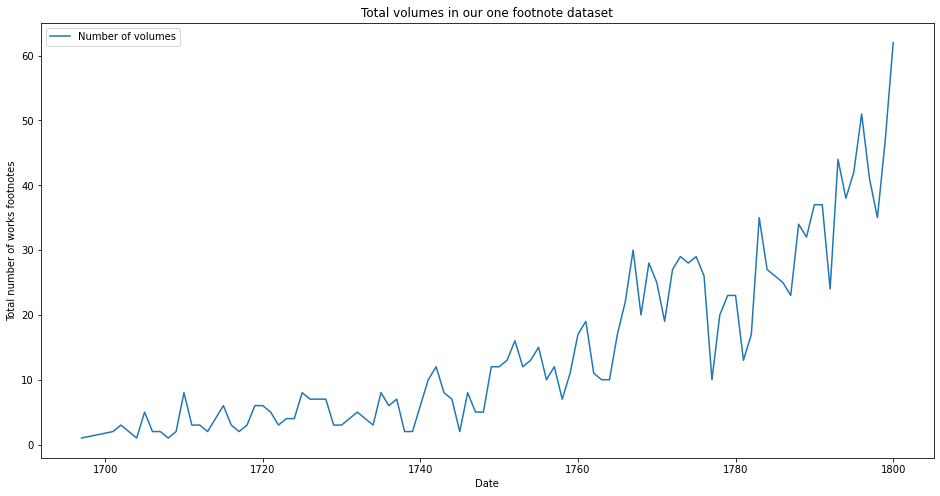

In [21]:
one_footnote_df.groupby('Date')[['footnotes_present']].count().plot(title="Total volumes in our one footnote dataset", figsize=(16,8))\
.set_ylabel("Total number of works footnotes")
plt.legend(["Number of volumes"])

Text(0, 0.5, 'Total number of works footnotes')

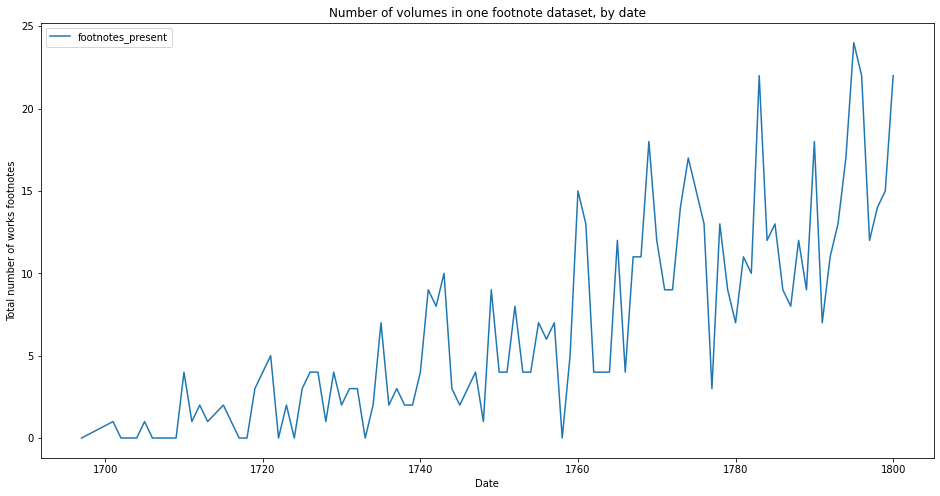

In [22]:
one_footnote_df.groupby('Date')[['footnotes_present']].sum().plot(title="Number of volumes in one footnote dataset, by date", figsize=(16,8))\
.set_ylabel("Total number of works footnotes")

Text(0, 0.5, 'Number of footnotes')

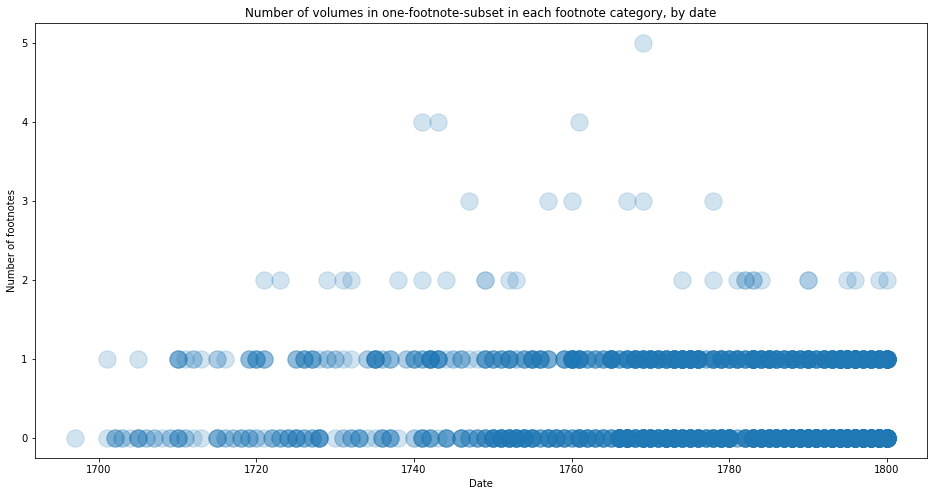

In [23]:
one_footnote_df.plot.scatter(x = 'Date', y = 'footnotes_present',  s=300, alpha=0.2, title="Number of volumes in one-footnote-subset in each footnote category, by date", figsize=(16,8)).set_ylabel("Number of footnotes")

In [24]:
one_footnote_df['fn_pages'].dtype

dtype('int64')

Text(0, 0.5, 'Number of footnotes')

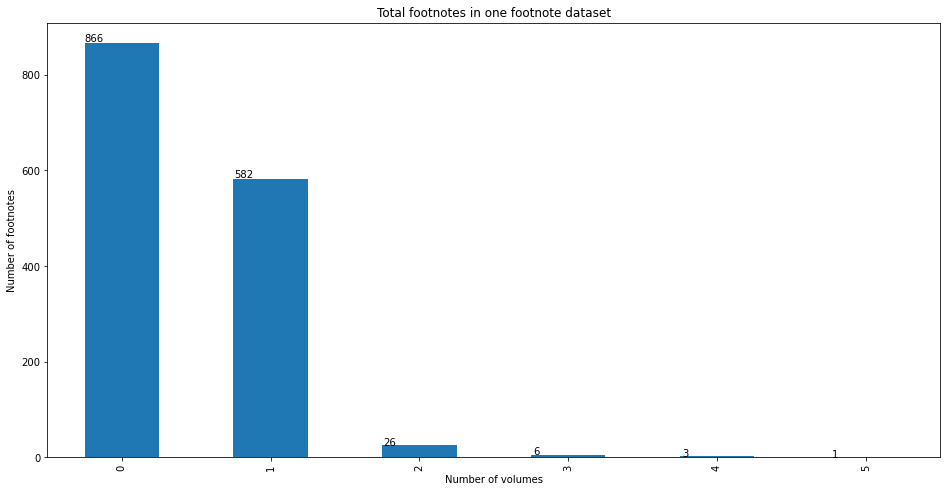

In [25]:
ax = one_footnote_df.groupby('footnotes_present')['DocumentID'].count().plot(kind='bar', title="Total footnotes in one footnote dataset", figsize=(16,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Number of volumes")
ax.set_ylabel("Number of footnotes")

Text(0, 0.5, 'Categories of foonoted pages (from 0 to 5 footnotes)')

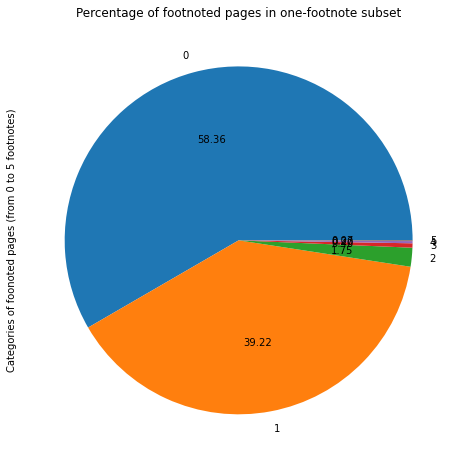

In [26]:
one_footnote_df['footnotes_present'].value_counts().plot(kind='pie',autopct='%.2f', title="Percentage of footnoted pages in one-footnote subset", figsize=(16,8))\
.set_ylabel("Categories of foonoted pages (from 0 to 5 footnotes)")

In [27]:
#Print the number of each footnote type
one_footnote_df['footnotes_present'].value_counts()

0    866
1    582
2     26
3      6
4      3
5      1
Name: footnotes_present, dtype: int64

In [28]:
one_footnote_df['footnotes_present'].count()

1484

### Percentage of each footnote category in our one footnote dataset:

In [29]:
# Print the percentage of each footnote category in our one footnote dataset
one_footnote_df['footnotes_present'].value_counts() / one_footnote_df['footnotes_present'].count() * 100

0    58.355795
1    39.218329
2     1.752022
3     0.404313
4     0.202156
5     0.067385
Name: footnotes_present, dtype: float64

In [30]:
one_footnote_df['Title'].value_counts()

The life and opinions of Tristram Shandy, gentleman. |...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          11
The adventures of Roderick Random. In two volumes. ...                                                                                                                                                                                                                            

In [31]:
one_footnote_df.describe()

Unnamed: 0    DocumentID         Date  fn_pages   nofn_pages  \
count  1484.000000  1.484000e+03  1484.000000    1484.0  1484.000000   
mean   4058.925876  5.871330e+08  1772.935984       1.0   239.410377   
std    2501.738625  4.469581e+08    23.377850       0.0   106.881887   
min       3.000000  1.007010e+05  1697.000000       1.0     6.000000   
25%    1840.750000  3.280028e+07  1761.000000       1.0   177.000000   
50%    3931.000000  6.603501e+08  1778.000000       1.0   241.000000   
75%    6069.500000  9.898002e+08  1792.000000       1.0   302.000000   
max    8606.000000  1.294101e+09  1800.000000       1.0   776.000000   

        fn.percent       decade  footnotes_present  
count  1484.000000  1484.000000        1484.000000  
mean      0.007124  1768.463612           0.450809  
std       0.012219    23.369226           0.587237  
min       0.001287  1690.000000           0.000000  
25%       0.003300  1760.000000           0.000000  
50%       0.004132  1770.000000           0.000000  
75%       0.005618  1790.000000           1.000000  
max       0.142857  1800.000000           5.000000

In [32]:
# Slice to include only volumes with more than 1 footnote per page
many_footnotes_one_page = one_footnote_df[one_footnote_df['footnotes_present'] > 1]

Text(0, 0.5, 'Categories of foonoted pages (from 2 to 5 footnotes)')

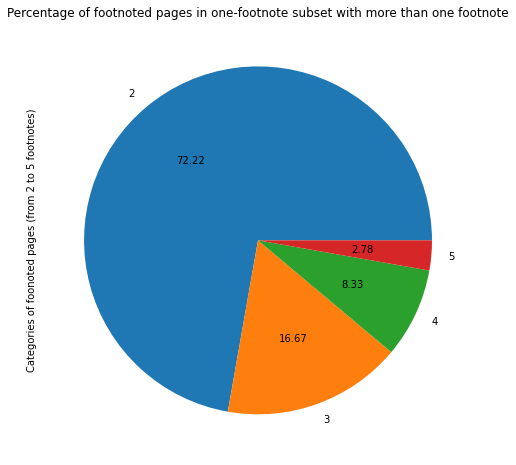

In [33]:
many_footnotes_one_page['footnotes_present'].value_counts().plot(kind='pie',autopct='%.2f', title="Percentage of footnoted pages in one-footnote subset with more than one footnote", figsize=(16,8))\
.set_ylabel("Categories of foonoted pages (from 2 to 5 footnotes)")

Text(0, 0.5, 'Number of volumes')

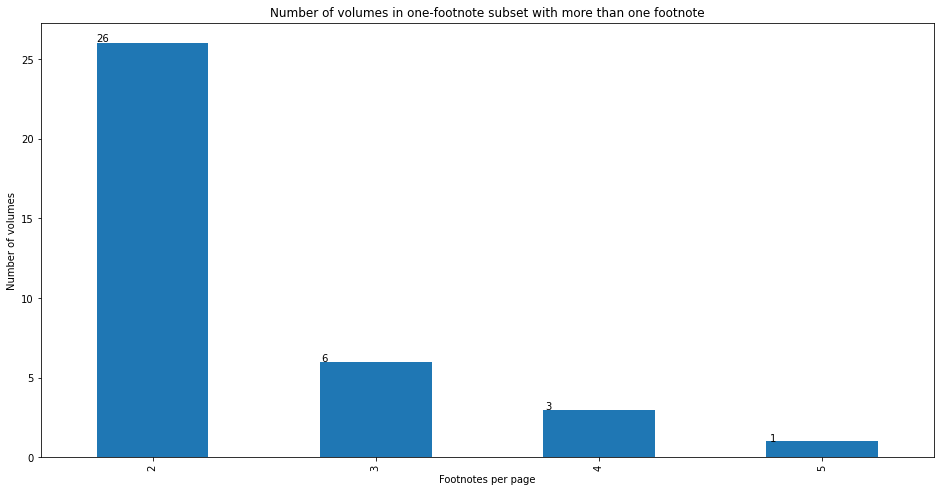

In [34]:
ax = many_footnotes_one_page['footnotes_present'].value_counts().plot(kind='bar', title="Number of volumes in one-footnote subset with more than one footnote", figsize=(16,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("Footnotes per page")
ax.set_ylabel("Number of volumes")

In [35]:
print(one_footnote_df['Title'])

0       Prince Arthur: an allegorical romance. The sto...
1       Prince Arthur: an allegorical romance. The sto...
2       Ismene and Ismenias, a novel translated from t...
3       Scelta di novelle di Giovanni Boccaccio, fatta...
4       The decameron, or ten days entertainment of Bo...
                              ...                        
1479    The tatler. By the Right Honourable Joseph Add...
1480    Olivia; or, deserted bride. By the author of H...
1481    The fables of Ph<c3><a6>drus in Latin and Engl...
1482    The observer: being a collection of moral, lit...
1483    The guardian. In two volumes. To which is adde...
Name: Title, Length: 1484, dtype: object


In [36]:
miscategorized_pages = one_footnote_df[one_footnote_df['footnotes_present'] == 0]

In [37]:
miscategorized_pages.to_csv('miscategorized_pages_in_one_footnote_dataset.csv', encoding='utf-8', index=False)

In [38]:
miscategorized_pages['Title'].value_counts()[:50]

The adventures of Peregrine Pickle. In which are included, Memoirs of a lady of quality. In four volumes. ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 7
The rambler. In four volumes. ...                                                                                                                                                                                                                                                                                                                                       

In [39]:
miscategorized_pages['Author'].value_counts()[:20]

Anon                                                        162
Smollett, Tobias George                                      29
Defoe, Daniel                                                28
Johnson, Samuel                                              22
Burney, Fanny                                                18
Haywood, Eliza Fowler                                        13
F<c3><a9>nelon, Fran<c3><a7>ois de Salignac de La Mothe-     11
Richardson, Samuel                                           10
Sterne, Laurence                                             10
Lady                                                         10
Reeve, Clara                                                  9
Bennett, Mrs. (Agnes Maria)                                   8
Brooke, Henry                                                 8
Fielding, Sarah                                               8
Steele, Richard, Sir                                          8
Fielding, Henry                         

In [40]:
miscategorized_pages_in_one_fn_set = pd.read_csv('miscategorized_pages_in_one_footnote_dataset.csv', encoding='utf-8')

In [41]:
miscategorized_pages_in_one_fn_set

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0          5099  0000100702.xml      100702  T134638  1779   
1          5100  0000100800.xml      100800  T112791  1788   
2           450  0000200500.xml      200500  T128705  1791   
3           458  0000300202.xml      300202  T102664  1789   
4          5103  0000300303.xml      300303  T130466  1787   
..          ...             ...         ...      ...   ...   
861        8371  1293500800.xml  1293500800  N063224  1754   
862        8379  1293700602.xml  1293700602  N069021  1787   
863        8385  1293900700.xml  1293900700  N031640  1761   
864        8387  1294000101.xml  1294000101  N061349  1787   
865        8396  1294100502.xml  1294100502  N017918  1752   

                                                 Title Vol_Number  \
0    Prince Arthur: an allegorical romance. The sto...   Volume 2   
1    Ismene and Ismenias, a novel translated from t...          0   
2    Scelta di novelle di Giovanni Boccaccio, fatta...          0   
3    Zelia in the desert. From the French. By the l...   Volume 2   
4    Laure, ou lettres de quelques personnes de Sui...   Volume 3   
..                                                 ...        ...   
861  The tatler. By the Right Honourable Joseph Add...          0   
862  Olivia; or, deserted bride. By the author of H...   Volume 2   
863  The fables of Ph<c3><a6>drus in Latin and Engl...          0   
864  The observer: being a collection of moral, lit...   Volume 1   
865  The guardian. In two volumes. To which is adde...   Volume 2   

                           Author  \
0             Bicknell, Alexander   
1       Eustathius, Macrembolites   
2             Boccaccio, Giovanni   
3    Daubenton, Mme. (Marguerite)   
4             Constant, Samuel de   
..                            ...   
861               Addison, Joseph   
862     Bonhote, Mrs. (Elizabeth)   
863                      Phaedrus   
864           Cumberland, Richard   
865                          Anon   

                                               Imprint  \
0    London : printed for G. Riley; and sold by F. ...   
1    London [i.e. Paris] : et se trouve <c3><a0> Pa...   
2    In Londra : presso Francesco Wingrave, success...   
3    London : printed for G. and T. Wilkie, No 71, ...   
4    A Londres [i.e. Paris?] : [s.n.], M.DCC.LXXXVI...   
..                                                 ...   
861  Glasgow : printed by Robert Urie, MDCCLIV. [17...   
862  Dublin : printed for Messrs. W. Watson, Gilber...   
863            Dublin : printed for John Exshaw, 1761.   
864  London : printed for C. Dilly in the Poultry, ...   
865  Dublin : printed for Peter Wilson, in Dame-Str...   

                                        Field_Headings  fn_pages  nofn_pages  \
0            Spenser, Edmund,, 1552?-1599, Adaptations         1         261   
1    Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
2                        Italian fiction, 18th century         1         306   
3              Voyages, Imaginary, Early works to 1800         1         257   
4      Epistolary fiction, French, Early works to 1800         1         300   
..                                                 ...       ...         ...   
861        Short stories, English, Early works to 1800         1         262   
862                      English fiction, 18th century         1         273   
863                                             Fables         1         142   
864  Conduct of life, Early works to 1900, Greek li...         1         303   
865  Great Britain, Politics and government, 1702-1...         1         412   

                TableName  fn.percent  decade  footnotes_present  
0    Manifest_LitAndLang2    0.003817    1770                  0  
1    Manifest_LitAndLang2    0.004717    1780                  0  
2    Manifest_LitAndLang1    0.003257    1790                  0  
3    Manifest_LitAndLang1    0.003876    1780               

## 3. One Footnote Subset, with tags

This subset is created from the ECCO-Footnote-Manifest-volumes-with-one-footnote.csv, using the data from Nick-Reading-ECCO-Footnote-Manifest-volumes-with-one-footnote.csv and Rachel-Set-Reading-ECCO-Footnote-Manifest-volumes-with-one-footnote-Rachel-section.csv, both updated as of April 9, 2021. I have concatenated the two sets here.

In [42]:
# Create a new dataframe with the annotated footnotes
one_footnote_tagged_df = pd.read_csv('RB-and-NA-Set-Reading-ECCO-Footnote-Manifest-volumes-with-one-footnote-with-tags.csv', encoding='utf-8', parse_dates=True)

In [43]:
one_footnote_tagged_df.head()

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0        5098  0000100701.xml      100701  T134638  1779   
1        5099  0000100702.xml      100702  T134638  1779   
2        5100  0000100800.xml      100800  T112791  1788   
3         450  0000200500.xml      200500  T128705  1791   
4         453  0000200700.xml      200700  T128696  1741   

                                               Title Vol_Number  \
0  Prince Arthur: an allegorical romance. The sto...   Volume 1   
1  Prince Arthur: an allegorical romance. The sto...   Volume 2   
2  Ismene and Ismenias, a novel translated from t...          0   
3  Scelta di novelle di Giovanni Boccaccio, fatta...          0   
4  The decameron, or ten days entertainment of Bo...          0   

                      Author  \
0        Bicknell, Alexander   
1        Bicknell, Alexander   
2  Eustathius, Macrembolites   
3        Boccaccio, Giovanni   
4        Boccaccio, Giovanni   

                                             Imprint  \
0  London : printed for G. Riley; and sold by F. ...   
1  London : printed for G. Riley; and sold by F. ...   
2  London [i.e. Paris] : et se trouve <c3><a0> Pa...   
3  In Londra : presso Francesco Wingrave, success...   
4  London : printed for R. Dodsley, at Tully's He...   

                                      Field_Headings  fn_pages  nofn_pages  \
0          Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
1          Spenser, Edmund,, 1552?-1599, Adaptations         1         261   
2  Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
3                      Italian fiction, 18th century         1         306   
4   Wood-engraving, English, Specimens, 17th century         1         600   

              TableName  fn.percent  decade  footnotes_present           tags  \
0  Manifest_LitAndLang2    0.003846    1770                  1          C, IT   
1  Manifest_LitAndLang2    0.003817    1770                  0             CW   
2  Manifest_LitAndLang2    0.004717    1780                  0  BQ, P, TY, TE   
3  Manifest_LitAndLang1    0.003257    1790                  0             SE   
4  Manifest_LitAndLang1    0.001664    1740                  2            NaN   

  Unnamed: 17 Unnamed: 18  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN

In [44]:
# splitting multivalue cells into rows by delimiter ','
tags_list = one_footnote_tagged_df.tags.str.split(',')
one_footnote_tagged_df.tags = tags_list

In [45]:
one_footnote_tagged_mr_df = one_footnote_tagged_df.explode('tags')

In [46]:
one_footnote_tagged_mr_df.head(10)

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0        5098  0000100701.xml      100701  T134638  1779   
0        5098  0000100701.xml      100701  T134638  1779   
1        5099  0000100702.xml      100702  T134638  1779   
2        5100  0000100800.xml      100800  T112791  1788   
2        5100  0000100800.xml      100800  T112791  1788   
2        5100  0000100800.xml      100800  T112791  1788   
2        5100  0000100800.xml      100800  T112791  1788   
3         450  0000200500.xml      200500  T128705  1791   
4         453  0000200700.xml      200700  T128696  1741   
5         458  0000300202.xml      300202  T102664  1789   

                                               Title Vol_Number  \
0  Prince Arthur: an allegorical romance. The sto...   Volume 1   
0  Prince Arthur: an allegorical romance. The sto...   Volume 1   
1  Prince Arthur: an allegorical romance. The sto...   Volume 2   
2  Ismene and Ismenias, a novel translated from t...          0   
2  Ismene and Ismenias, a novel translated from t...          0   
2  Ismene and Ismenias, a novel translated from t...          0   
2  Ismene and Ismenias, a novel translated from t...          0   
3  Scelta di novelle di Giovanni Boccaccio, fatta...          0   
4  The decameron, or ten days entertainment of Bo...          0   
5  Zelia in the desert. From the French. By the l...   Volume 2   

                         Author  \
0           Bicknell, Alexander   
0           Bicknell, Alexander   
1           Bicknell, Alexander   
2     Eustathius, Macrembolites   
2     Eustathius, Macrembolites   
2     Eustathius, Macrembolites   
2     Eustathius, Macrembolites   
3           Boccaccio, Giovanni   
4           Boccaccio, Giovanni   
5  Daubenton, Mme. (Marguerite)   

                                             Imprint  \
0  London : printed for G. Riley; and sold by F. ...   
0  London : printed for G. Riley; and sold by F. ...   
1  London : printed for G. Riley; and sold by F. ...   
2  London [i.e. Paris] : et se trouve <c3><a0> Pa...   
2  London [i.e. Paris] : et se trouve <c3><a0> Pa...   
2  London [i.e. Paris] : et se trouve <c3><a0> Pa...   
2  London [i.e. Paris] : et se trouve <c3><a0> Pa...   
3  In Londra : presso Francesco Wingrave, success...   
4  London : printed for R. Dodsley, at Tully's He...   
5  London : printed for G. and T. Wilkie, No 71, ...   

                                      Field_Headings  fn_pages  nofn_pages  \
0          Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
0          Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
1          Spenser, Edmund,, 1552?-1599, Adaptations         1         261   
2  Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
2  Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
2  Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
2  Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
3                      Italian fiction, 18th century         1         306   
4   Wood-engraving, English, Specimens, 17th century         1         600   
5            Voyages, Imaginary, Early works to 1800         1         257   

              TableName  fn.percent  decade  footnotes_present tags  \
0  Manifest_LitAndLang2    0.003846    1770                  1    C   
0  Manifest_LitAndLang2    0.003846    1770                  1   IT   
1  Manifest_LitAndLang2    0.003817    1770                  0   CW   
2  Manifest_LitAndLang2    0.004717    1780                  0   BQ   
2  Manifest_LitAndLang2    0.004717    1780                  0    P   
2  Manifest_LitAndLang2    0.004717    1780                  0   TY   
2  Manifest_LitAndLang2    0.004717    1780                  0   TE   
3  Manifest_LitAndLang1    0.003257    1790                  0   SE   
4  Manifest_LitAndLang1    0.001664    1740                  2  NaN   
5  Manifest_LitAndLang1    0.003

In [47]:
one_footnote_tagged_mr_df['tags'].dtype

dtype('O')

In [48]:
# splitting multi-valued cells by delimiter '/'
tags_list = one_footnote_tagged_mr_df.tags.str.split('/')
one_footnote_tagged_mr_df.tags = tags_list

In [49]:
one_footnote_tagged_MR_df = one_footnote_tagged_mr_df.explode('tags')

In [50]:
one_footnote_tagged_MR_df

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0           5098  0000100701.xml      100701  T134638  1779   
0           5098  0000100701.xml      100701  T134638  1779   
1           5099  0000100702.xml      100702  T134638  1779   
2           5100  0000100800.xml      100800  T112791  1788   
2           5100  0000100800.xml      100800  T112791  1788   
...          ...             ...         ...      ...   ...   
1482        8387  1294000101.xml  1294000101  N061349  1787   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   

                                                  Title Vol_Number  \
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
1     Prince Arthur: an allegorical romance. The sto...   Volume 2   
2     Ismene and Ismenias, a novel translated from t...          0   
2     Ismene and Ismenias, a novel translated from t...          0   
...                                                 ...        ...   
1482  The observer: being a collection of moral, lit...   Volume 1   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   

                         Author  \
0           Bicknell, Alexander   
0           Bicknell, Alexander   
1           Bicknell, Alexander   
2     Eustathius, Macrembolites   
2     Eustathius, Macrembolites   
...                         ...   
1482        Cumberland, Richard   
1483                       Anon   
1483                       Anon   
1483                       Anon   
1483                       Anon   

                                                Imprint  \
0     London : printed for G. Riley; and sold by F. ...   
0     London : printed for G. Riley; and sold by F. ...   
1     London : printed for G. Riley; and sold by F. ...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
...                                                 ...   
1482  London : printed for C. Dilly in the Poultry, ...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   

                                         Field_Headings  fn_pages  nofn_pages  \
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
1             Spenser, Edmund,, 1552?-1599, Adaptations         1         261   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
...                                                 ...       ...         ...   
1482  Conduct of life, Early works to 1900, Greek li...         1         303   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   

                 TableName  fn.percent  decade  footnotes_present tags  \
0     Manifest_LitAndLang2    0.003846    1770                  1    C   
0     Manifest_LitAndLang2    0.003846    1770                  1   IT   
1     Manifest_LitAndLang2    0.003817    1770                  0   CW   
2     Man

In [51]:
# Removing whitespaces
one_footnote_tagged_MR_df.tags = one_footnote_tagged_MR_df.tags.str.replace(' ', '')
one_footnote_tagged_MR_df['tags'].value_counts()

CW       600
TY       411
C        235
FN       226
SM       203
P        175
PB       167
BQ       161
IT       122
LB       118
T         93
O         90
TE        87
IN        82
SE        65
MT        50
LS        44
PO        41
RQ        22
D         12
M         10
PE         4
SD         3
I          2
BP         1
LP         1
CW.TY      1
RQ.CW      1
P.LB       1
TY.CW      1
LD         1
CH         1
TE.LS      1
NY         1
Name: tags, dtype: int64

In [52]:
one_footnote_tagged_MR_df

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0           5098  0000100701.xml      100701  T134638  1779   
0           5098  0000100701.xml      100701  T134638  1779   
1           5099  0000100702.xml      100702  T134638  1779   
2           5100  0000100800.xml      100800  T112791  1788   
2           5100  0000100800.xml      100800  T112791  1788   
...          ...             ...         ...      ...   ...   
1482        8387  1294000101.xml  1294000101  N061349  1787   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   

                                                  Title Vol_Number  \
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
1     Prince Arthur: an allegorical romance. The sto...   Volume 2   
2     Ismene and Ismenias, a novel translated from t...          0   
2     Ismene and Ismenias, a novel translated from t...          0   
...                                                 ...        ...   
1482  The observer: being a collection of moral, lit...   Volume 1   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   

                         Author  \
0           Bicknell, Alexander   
0           Bicknell, Alexander   
1           Bicknell, Alexander   
2     Eustathius, Macrembolites   
2     Eustathius, Macrembolites   
...                         ...   
1482        Cumberland, Richard   
1483                       Anon   
1483                       Anon   
1483                       Anon   
1483                       Anon   

                                                Imprint  \
0     London : printed for G. Riley; and sold by F. ...   
0     London : printed for G. Riley; and sold by F. ...   
1     London : printed for G. Riley; and sold by F. ...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
...                                                 ...   
1482  London : printed for C. Dilly in the Poultry, ...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   

                                         Field_Headings  fn_pages  nofn_pages  \
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
1             Spenser, Edmund,, 1552?-1599, Adaptations         1         261   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
...                                                 ...       ...         ...   
1482  Conduct of life, Early works to 1900, Greek li...         1         303   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   

                 TableName  fn.percent  decade  footnotes_present tags  \
0     Manifest_LitAndLang2    0.003846    1770                  1    C   
0     Manifest_LitAndLang2    0.003846    1770                  1   IT   
1     Manifest_LitAndLang2    0.003817    1770                  0   CW   
2     Man

In [53]:
# Adding a new column called "tag" concatenating the results from "tags" and
# "Unanamed: 17" the secondary tag column. We'll split these up later
one_footnote_tagged_MR_df['tag'] = one_footnote_tagged_MR_df[one_footnote_tagged_MR_df.columns[16:]].apply(
    lambda x: '/'.join(x.dropna().astype(str)),
    axis=1
)
one_footnote_tagged_MR_df

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0           5098  0000100701.xml      100701  T134638  1779   
0           5098  0000100701.xml      100701  T134638  1779   
1           5099  0000100702.xml      100702  T134638  1779   
2           5100  0000100800.xml      100800  T112791  1788   
2           5100  0000100800.xml      100800  T112791  1788   
...          ...             ...         ...      ...   ...   
1482        8387  1294000101.xml  1294000101  N061349  1787   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   

                                                  Title Vol_Number  \
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
1     Prince Arthur: an allegorical romance. The sto...   Volume 2   
2     Ismene and Ismenias, a novel translated from t...          0   
2     Ismene and Ismenias, a novel translated from t...          0   
...                                                 ...        ...   
1482  The observer: being a collection of moral, lit...   Volume 1   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   

                         Author  \
0           Bicknell, Alexander   
0           Bicknell, Alexander   
1           Bicknell, Alexander   
2     Eustathius, Macrembolites   
2     Eustathius, Macrembolites   
...                         ...   
1482        Cumberland, Richard   
1483                       Anon   
1483                       Anon   
1483                       Anon   
1483                       Anon   

                                                Imprint  \
0     London : printed for G. Riley; and sold by F. ...   
0     London : printed for G. Riley; and sold by F. ...   
1     London : printed for G. Riley; and sold by F. ...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
...                                                 ...   
1482  London : printed for C. Dilly in the Poultry, ...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   

                                         Field_Headings  fn_pages  nofn_pages  \
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
1             Spenser, Edmund,, 1552?-1599, Adaptations         1         261   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
...                                                 ...       ...         ...   
1482  Conduct of life, Early works to 1900, Greek li...         1         303   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   

                 TableName  fn.percent  decade  footnotes_present tags  \
0     Manifest_LitAndLang2    0.003846    1770                  1    C   
0     Manifest_LitAndLang2    0.003846    1770                  1   IT   
1     Manifest_LitAndLang2    0.003817    1770                  0   CW   
2     Man

In [54]:
# Now, splitting multi-valued cells in "tag" by /
tag_list = one_footnote_tagged_MR_df.tag.str.split('/')
one_footnote_tagged_MR_df.tag = tag_list

In [55]:
one_footnote_tagged_MR_df = one_footnote_tagged_MR_df.explode('tag')

In [56]:
one_footnote_tagged_MR_df

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0           5098  0000100701.xml      100701  T134638  1779   
0           5098  0000100701.xml      100701  T134638  1779   
1           5099  0000100702.xml      100702  T134638  1779   
2           5100  0000100800.xml      100800  T112791  1788   
2           5100  0000100800.xml      100800  T112791  1788   
...          ...             ...         ...      ...   ...   
1482        8387  1294000101.xml  1294000101  N061349  1787   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   

                                                  Title Vol_Number  \
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
1     Prince Arthur: an allegorical romance. The sto...   Volume 2   
2     Ismene and Ismenias, a novel translated from t...          0   
2     Ismene and Ismenias, a novel translated from t...          0   
...                                                 ...        ...   
1482  The observer: being a collection of moral, lit...   Volume 1   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   

                         Author  \
0           Bicknell, Alexander   
0           Bicknell, Alexander   
1           Bicknell, Alexander   
2     Eustathius, Macrembolites   
2     Eustathius, Macrembolites   
...                         ...   
1482        Cumberland, Richard   
1483                       Anon   
1483                       Anon   
1483                       Anon   
1483                       Anon   

                                                Imprint  \
0     London : printed for G. Riley; and sold by F. ...   
0     London : printed for G. Riley; and sold by F. ...   
1     London : printed for G. Riley; and sold by F. ...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
...                                                 ...   
1482  London : printed for C. Dilly in the Poultry, ...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   

                                         Field_Headings  fn_pages  nofn_pages  \
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
1             Spenser, Edmund,, 1552?-1599, Adaptations         1         261   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
...                                                 ...       ...         ...   
1482  Conduct of life, Early works to 1900, Greek li...         1         303   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   
1483  Great Britain, Politics and government, 1702-1...         1         412   

                 TableName  fn.percent  decade  footnotes_present tags  \
0     Manifest_LitAndLang2    0.003846    1770                  1    C   
0     Manifest_LitAndLang2    0.003846    1770                  1   IT   
1     Manifest_LitAndLang2    0.003817    1770                  0   CW   
2     Man

In [57]:
# Now, splitting multi-valued cells in "tag" by .
tag_list = one_footnote_tagged_MR_df.tag.str.split('.')
one_footnote_tagged_MR_df.tag = tag_list

In [58]:
one_footnote_tagged_MR_df = one_footnote_tagged_MR_df.explode('tag')

In [59]:
one_footnote_tagged_MR_df.tag

0        C
0       IT
1       CW
2       BQ
2        P
        ..
1482    LB
1483    LB
1483     P
1483    TY
1483    CW
Name: tag, Length: 3359, dtype: object

In [60]:
# Now, splitting multi-valued cells in "tag" by ,
tag_list = one_footnote_tagged_MR_df.tag.str.split(',')
one_footnote_tagged_MR_df.tag = tag_list

In [61]:
one_footnote_tagged_MR_df = one_footnote_tagged_MR_df.explode('tag')

In [62]:
one_footnote_tagged_MR_df.tag

0        C
0       IT
1       CW
2       BQ
2        P
        ..
1482    LB
1483    LB
1483     P
1483    TY
1483    CW
Name: tag, Length: 3385, dtype: object

In [63]:
# Removing whitespaces
one_footnote_tagged_MR_df.tag = one_footnote_tagged_MR_df.tag.str.replace(' ', '')
one_footnote_tagged_MR_df['tag'].value_counts()

CW    603
TY    413
C     367
FN    226
SM    203
IT    185
P     176
PB    167
BQ    161
LB    119
IN    116
T     109
O      90
TE     88
SE     65
NN     57
MT     55
LS     45
PO     41
       39
RQ     23
D      12
M      10
PE      4
SD      3
I       2
CH      1
LD      1
NY      1
R       1
BP      1
LP      1
Name: tag, dtype: int64

In [66]:
# Create two new new column with a Boolean True/False for whether footnotes present
one_footnote_tagged_MR_df.loc[one_footnote_tagged_MR_df['footnotes_present'] > 0, 'fn_present_bool'] = 'True' 

In [67]:
one_footnote_tagged_MR_df.loc[one_footnote_tagged_MR_df['footnotes_present'] == 0, 'fn_present_bool'] = 'False' 

In [68]:
one_footnote_tagged_MR_df

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0           5098  0000100701.xml      100701  T134638  1779   
0           5098  0000100701.xml      100701  T134638  1779   
1           5099  0000100702.xml      100702  T134638  1779   
2           5100  0000100800.xml      100800  T112791  1788   
2           5100  0000100800.xml      100800  T112791  1788   
...          ...             ...         ...      ...   ...   
1482        8387  1294000101.xml  1294000101  N061349  1787   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   
1483        8396  1294100502.xml  1294100502  N017918  1752   

                                                  Title Vol_Number  \
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
1     Prince Arthur: an allegorical romance. The sto...   Volume 2   
2     Ismene and Ismenias, a novel translated from t...          0   
2     Ismene and Ismenias, a novel translated from t...          0   
...                                                 ...        ...   
1482  The observer: being a collection of moral, lit...   Volume 1   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   
1483  The guardian. In two volumes. To which is adde...   Volume 2   

                         Author  \
0           Bicknell, Alexander   
0           Bicknell, Alexander   
1           Bicknell, Alexander   
2     Eustathius, Macrembolites   
2     Eustathius, Macrembolites   
...                         ...   
1482        Cumberland, Richard   
1483                       Anon   
1483                       Anon   
1483                       Anon   
1483                       Anon   

                                                Imprint  \
0     London : printed for G. Riley; and sold by F. ...   
0     London : printed for G. Riley; and sold by F. ...   
1     London : printed for G. Riley; and sold by F. ...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
...                                                 ...   
1482  London : printed for C. Dilly in the Poultry, ...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   

                                         Field_Headings  ...  nofn_pages  \
0             Spenser, Edmund,, 1552?-1599, Adaptations  ...         259   
0             Spenser, Edmund,, 1552?-1599, Adaptations  ...         259   
1             Spenser, Edmund,, 1552?-1599, Adaptations  ...         261   
2     Eustathius,, Macrembolites,, 12th cent., De Is...  ...         211   
2     Eustathius,, Macrembolites,, 12th cent., De Is...  ...         211   
...                                                 ...  ...         ...   
1482  Conduct of life, Early works to 1900, Greek li...  ...         303   
1483  Great Britain, Politics and government, 1702-1...  ...         412   
1483  Great Britain, Politics and government, 1702-1...  ...         412   
1483  Great Britain, Politics and government, 1702-1...  ...         412   
1483  Great Britain, Politics and government, 1702-1...  ...         412   

                 TableName fn.percent  decade  footnotes_present  tags  \
0     Manifest_LitAndLang2   0.003846    1770                  1     C   
0     Manifest_LitAndLang2   0.003846    1770                  1    IT   
1     Manifest_LitAndLang2   0.003817    1770                  0    CW   
2     Manifest_LitAndLang2   0.004717    1780                  0    B

In [69]:
# Group tags using our boolean column, "fn_present"
one_footnote_tagged_MR_df.groupby(['tag','fn_present_bool'])['footnotes_present'].count()

tag  fn_present_bool
     False               12
     True                27
BP   False                1
BQ   False              159
     True                 2
C    False               11
     True               356
CH   False                1
CW   False              593
     True                10
D    False               12
FN   False                9
     True               217
I    False                2
IN   False                8
     True               108
IT   False                5
     True               180
LB   False              118
     True                 1
LD   False                1
LP   False                1
LS   False               45
M    False                9
     True                 1
MT   False                1
     True                54
NN   False               41
     True                16
NY   False                1
O    False               87
     True                 3
P    False              174
     True                 2
PB   False              165

In [70]:
# Assign this groupby object to variable 
tags_df = one_footnote_tagged_MR_df.groupby(['tag','fn_present_bool'])['footnotes_present'].count()

In [71]:
# Unstack so that we have two new columns for our boolean True, False
tags_unstacked_df = tags_df.unstack(level=-1)

In [107]:
print("Tag counts, sorted by whether or not footnotes present:")
tags_unstacked_df

Tag counts, sorted by whether or not footnotes present:


fn_present_bool  False   True
tag                          
                  12.0   27.0
BP                 1.0    NaN
BQ               159.0    2.0
C                 11.0  356.0
CH                 1.0    NaN
CW               593.0   10.0
D                 12.0    NaN
FN                 9.0  217.0
I                  2.0    NaN
IN                 8.0  108.0
IT                 5.0  180.0
LB               118.0    1.0
LD                 1.0    NaN
LP                 1.0    NaN
LS                45.0    NaN
M                  9.0    1.0
MT                 1.0   54.0
NN                41.0   16.0
NY                 1.0    NaN
O                 87.0    3.0
P                174.0    2.0
PB               165.0    2.0
PE                 4.0    NaN
PO                41.0    NaN
R                  1.0    NaN
RQ                23.0    NaN
SD                 3.0    NaN
SE                64.0    1.0
SM               201.0    2.0
T                  5.0  104.0
TE                88.0    NaN
TY               408.0    5.0

### Plot the number of footnoted and unfootnoted pages for each tag

Text(0, 0.5, 'Number of pages')

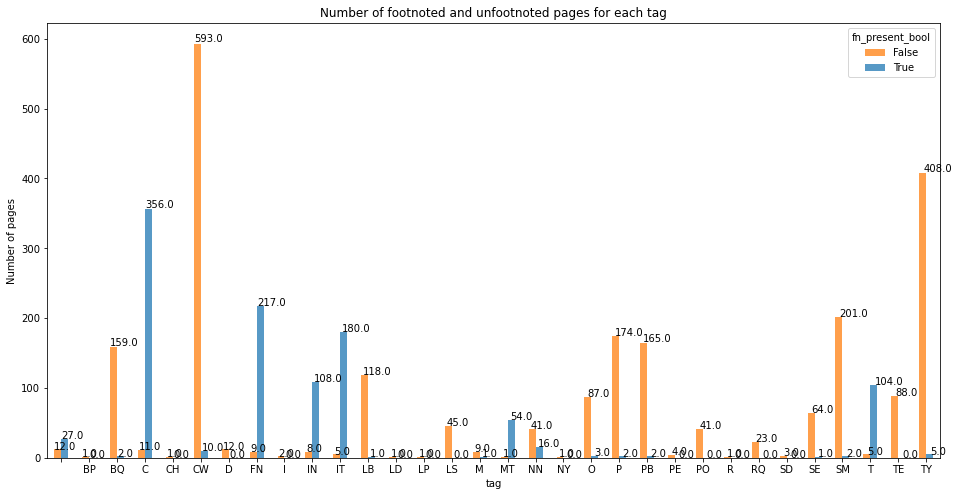

In [108]:
# Plot our tags
ax = tags_unstacked_df.plot(kind='bar', color=['tab:orange','tab:blue'], title="Number of footnoted and unfootnoted pages for each tag", figsize=(16,8), alpha=0.75, rot=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.ylabel("Number of pages")

## What tags appear together?
### First, process our tag data


In [87]:
# Adding a new column called "tag" concatenating the results from "tags" and
# "Unanamed: 17" the secondary tag columns. 
one_footnote_tagged_new_df = one_footnote_tagged_df
one_footnote_tagged_new_df['tag'] = one_footnote_tagged_df[one_footnote_tagged_df.columns[16:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
one_footnote_tagged_new_df 

Unnamed: 0        Filename  DocumentID  ESTC_ID  Date  \
0           5098  0000100701.xml      100701  T134638  1779   
1           5099  0000100702.xml      100702  T134638  1779   
2           5100  0000100800.xml      100800  T112791  1788   
3            450  0000200500.xml      200500  T128705  1791   
4            453  0000200700.xml      200700  T128696  1741   
...          ...             ...         ...      ...   ...   
1479        8371  1293500800.xml  1293500800  N063224  1754   
1480        8379  1293700602.xml  1293700602  N069021  1787   
1481        8385  1293900700.xml  1293900700  N031640  1761   
1482        8387  1294000101.xml  1294000101  N061349  1787   
1483        8396  1294100502.xml  1294100502  N017918  1752   

                                                  Title Vol_Number  \
0     Prince Arthur: an allegorical romance. The sto...   Volume 1   
1     Prince Arthur: an allegorical romance. The sto...   Volume 2   
2     Ismene and Ismenias, a novel translated from t...          0   
3     Scelta di novelle di Giovanni Boccaccio, fatta...          0   
4     The decameron, or ten days entertainment of Bo...          0   
...                                                 ...        ...   
1479  The tatler. By the Right Honourable Joseph Add...          0   
1480  Olivia; or, deserted bride. By the author of H...   Volume 2   
1481  The fables of Ph<c3><a6>drus in Latin and Engl...          0   
1482  The observer: being a collection of moral, lit...   Volume 1   
1483  The guardian. In two volumes. To which is adde...   Volume 2   

                         Author  \
0           Bicknell, Alexander   
1           Bicknell, Alexander   
2     Eustathius, Macrembolites   
3           Boccaccio, Giovanni   
4           Boccaccio, Giovanni   
...                         ...   
1479            Addison, Joseph   
1480  Bonhote, Mrs. (Elizabeth)   
1481                   Phaedrus   
1482        Cumberland, Richard   
1483                       Anon   

                                                Imprint  \
0     London : printed for G. Riley; and sold by F. ...   
1     London : printed for G. Riley; and sold by F. ...   
2     London [i.e. Paris] : et se trouve <c3><a0> Pa...   
3     In Londra : presso Francesco Wingrave, success...   
4     London : printed for R. Dodsley, at Tully's He...   
...                                                 ...   
1479  Glasgow : printed by Robert Urie, MDCCLIV. [17...   
1480  Dublin : printed for Messrs. W. Watson, Gilber...   
1481            Dublin : printed for John Exshaw, 1761.   
1482  London : printed for C. Dilly in the Poultry, ...   
1483  Dublin : printed for Peter Wilson, in Dame-Str...   

                                         Field_Headings  fn_pages  nofn_pages  \
0             Spenser, Edmund,, 1552?-1599, Adaptations         1         259   
1             Spenser, Edmund,, 1552?-1599, Adaptations         1         261   
2     Eustathius,, Macrembolites,, 12th cent., De Is...         1         211   
3                         Italian fiction, 18th century         1         306   
4      Wood-engraving, English, Specimens, 17th century         1         600   
...                                                 ...       ...         ...   
1479        Short stories, English, Early works to 1800         1         262   
1480                      English fiction, 18th century         1         273   
1481                                             Fables         1         142   
1482  Conduct of life, Early works to 1900, Greek li...         1         303   
1483  Great Britain, Politics and government, 1702-1...         1         412   

                 TableName  fn.percent  decade  footnotes_present  \
0     Manifest_LitAndLang2    0.003846    1770                  1   
1     Manifest_LitAndLang2    0.003817    1770                  0   
2     Manifest_LitAndLang2    0.004717    1780                  0   
3     Manifest_LitAndLang1   

In [88]:
one_footnote_tagged_new_df['tag'].value_counts().to_csv('multi-tag-categories.csv')

In [89]:
## Exported to Open-Refine, where I used k-means clustering to match different sequences of tag combinations 
## eg a footnote tagged CW, PB is the same as PB, CW
## Re-importing cleaned data below

In [90]:
multi_tagged_footnotes = pd.read_csv('multi-tag-categories-cleaned.csv', encoding='utf-8')

### Plot the counts of each combinations of tags in our dataset:

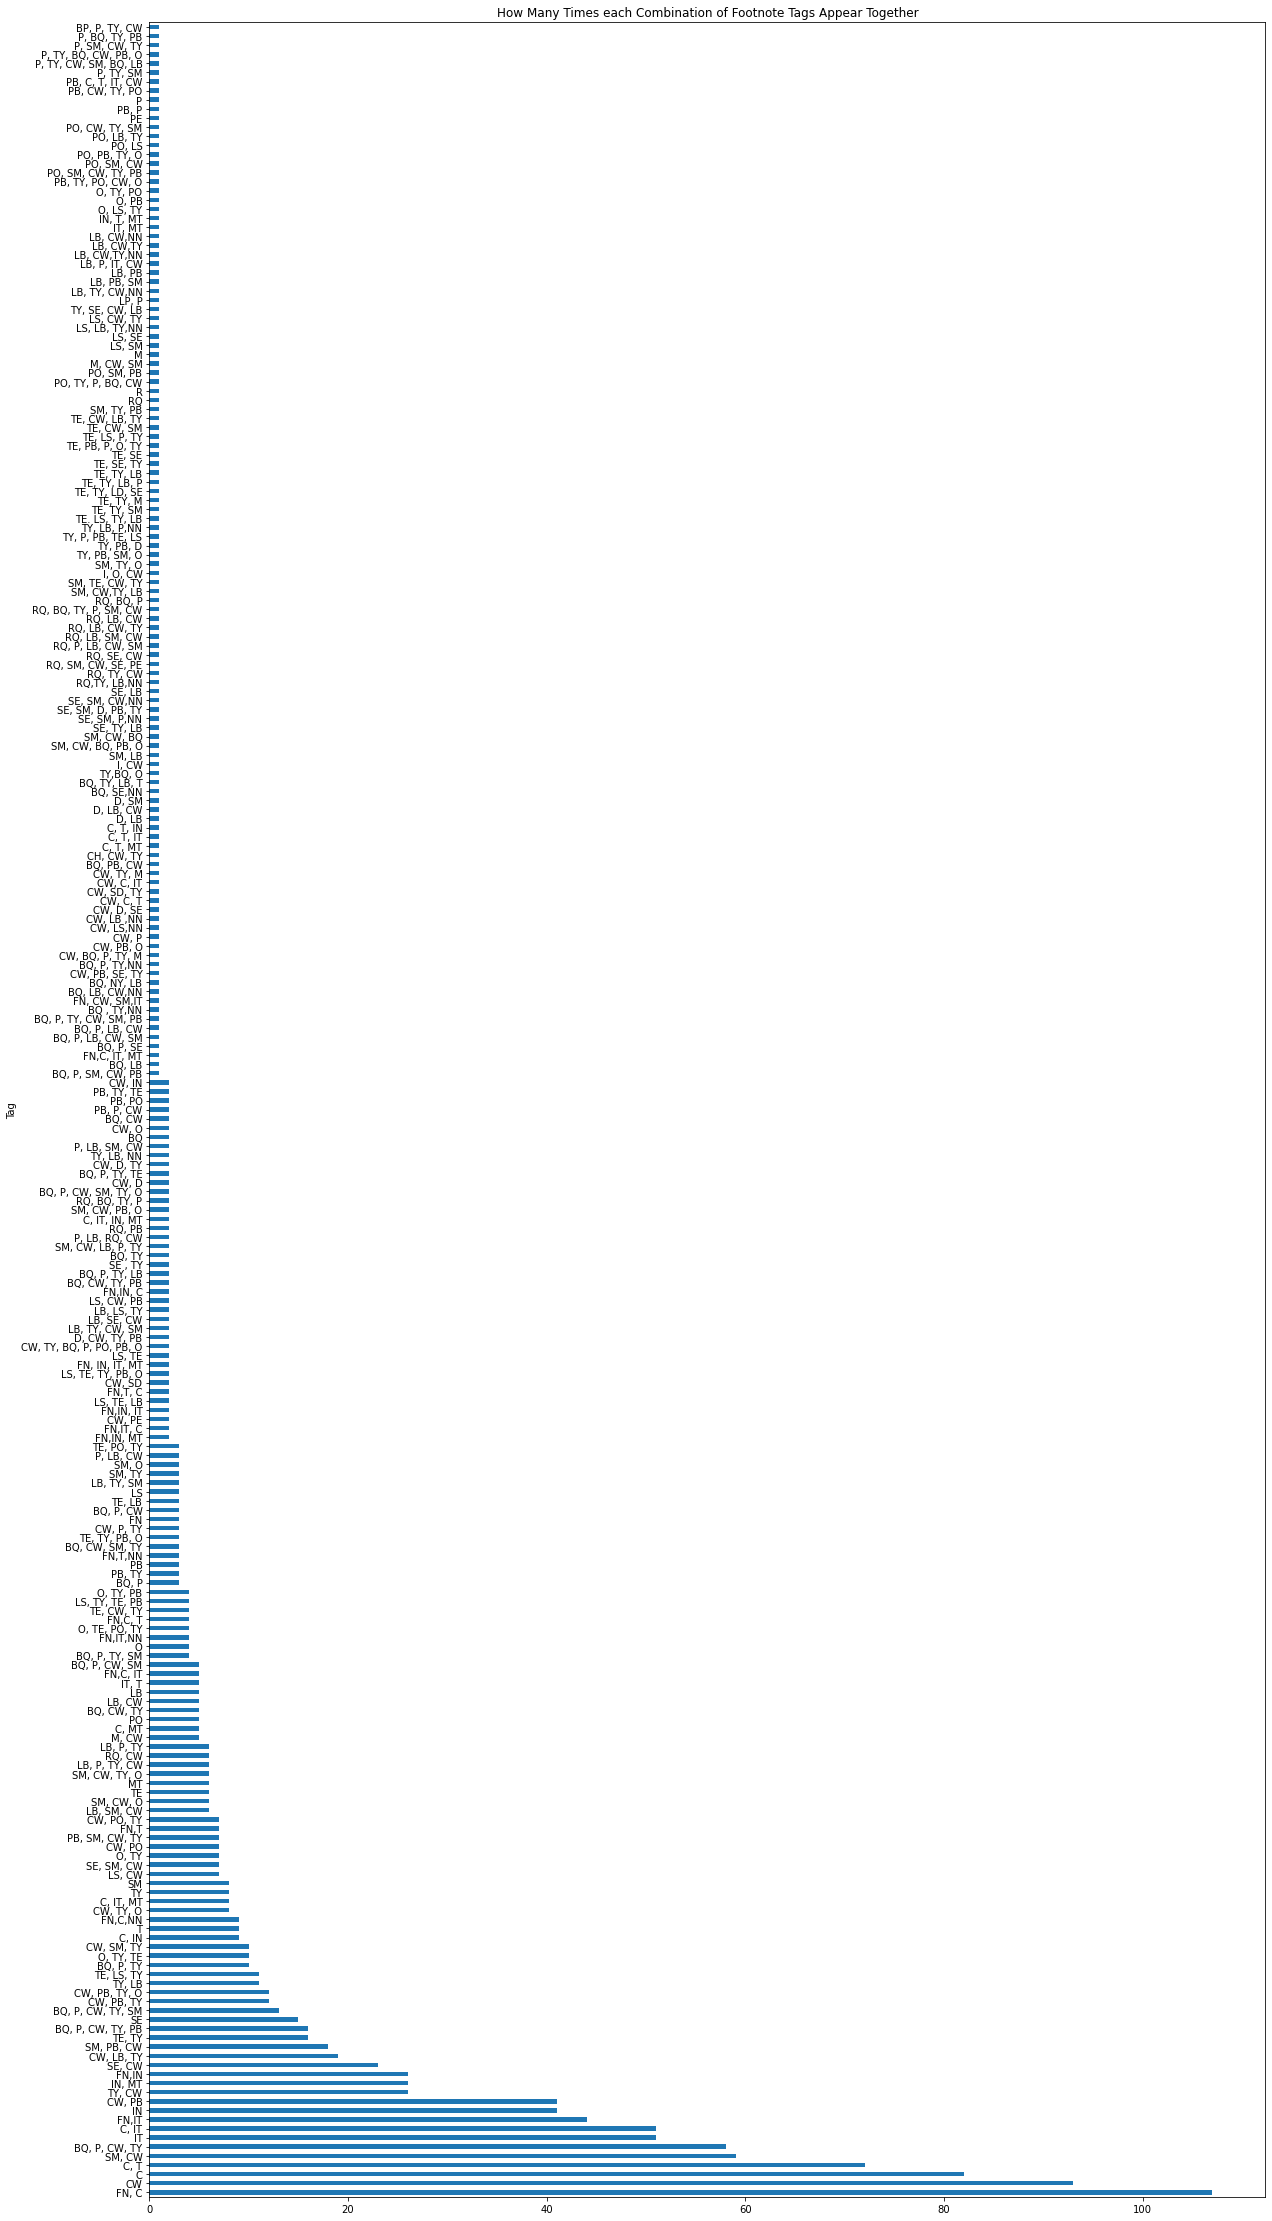

In [91]:
# Plot the combinations of tags
multi_tagged_footnotes.groupby('Tag')['Count'].sum().sort_values(ascending=False)\
.plot(kind='barh', figsize=(20,40), title="How Many Times each Combination of Footnote Tags Appear Together")

In [93]:
multi_tagged_footnotes

Count                Tag
0      103              FN, C
1       91                 CW
2       82                  C
3       64               C, T
4       51                 IT
..     ...                ...
404      1             LB, CW
405      1             CW, PO
406      1     LB, TY, CW, SM
407      1  BQ, P, CW, TY, PB
408      1      C, IT, IN, MT

[409 rows x 2 columns]

## Stats on our tagged one-footnote dataset 
### Number of total footnotes in the one-footnote subset

In [103]:
print("Number of total volumes in our one-footnote subset:")
one_footnote_tagged_df['footnotes_present'].count()

Number of total volumes in our one-footnote subset:


1484

### How many volumes in this subset actually have foonotes: 

In [105]:
print("Number of volumes in subset WITH footnotes:")
one_footnote_tagged_df[one_footnote_tagged_df['footnotes_present'] != 0]['tag'].count()

Number of volumes in subset WITH footnotes:


618

### How many volumes in this subset DO NO have foonotes: 

In [101]:
print("Number of volumes in subset WITHOUT footnotes:")
one_footnote_tagged_df[one_footnote_tagged_df['footnotes_present'] == 0]['tag'].count()

Number of volumes in subset WITHOUT footnotes:


866

### How many volumes in this subset are tagged "Not a Novel"

In [106]:
print('Number of volumes in subset tagged "Not a Novel"')
one_footnote_tagged_MR_df[one_footnote_tagged_MR_df['tag'] == 'NN']['tag'].count() # note the difference n dataframe

Number of volumes in subset tagged "Not a Novel"


57

### What are the top tags in this dataset?

In [100]:
# Print out the number of times each tag appears in our dataset
print('Tags in our dataset, by count:')
one_footnote_tagged_MR_df['tag'].value_counts()

Tags in our dataset, by count:


CW    603
TY    413
C     367
FN    226
SM    203
IT    185
P     176
PB    167
BQ    161
LB    119
IN    116
T     109
O      90
TE     88
SE     65
NN     57
MT     55
LS     45
PO     41
       39
RQ     23
D      12
M      10
PE      4
SD      3
I       2
R       1
LP      1
NY      1
LD      1
BP      1
CH      1
Name: tag, dtype: int64